In [97]:
!pip install pyheif


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 48.2 MB/s eta 0:00:00


In [152]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 776.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [18]:
cd /content/drive/MyDrive/Colab Notebooks/data

/content/drive/MyDrive/Colab Notebooks/data


In [28]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip

--2024-12-29 18:51:30--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M  39.7MB/s    in 3.7s    

2024-12-29 18:51:34 (38.8 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip

--2024-12-29 14:24:17--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  38.1MB/s    in 0.3s    

2024-12-29 14:24:17 (38.1 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [1]:
training_folder = './horse-or-human'
validation_folder = './validation-horse-or-human'

In [8]:
!mkdir -p $training_folder
!unzip -q horse-or-human.zip -d $training_folder

In [51]:
!mkdir -p $validation_folder
!unzip -q validation-horse-or-human.zip -d $validation_folder

In [12]:
train_horse_dir = 'horse-or-human/horses'
train_human_dir = 'horse-or-human/humans'
validation_horse_dir = 'validation-horse-or-human/horses'
validation_human_dir = 'validation-horse-or-human/humans'

In [3]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout

In [79]:
model = Sequential()

In [80]:
model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))

In [81]:
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))

In [82]:
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

In [83]:
model.add(Flatten())

In [84]:
model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))

In [85]:
model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

In [86]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      10,617,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,641,441 (40.59 MB)

 Trainable params: 10,641,441 (40.59 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [87]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# data processing

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [89]:
train_generator = ImageDataGenerator(
    rescale=1/255.0,
    # rotation_range=40,       # Xoay ngẫu nhiên ảnh từ 0 đến 40 độ
    # width_shift_range=0.2,   # Dịch chuyển ngang tối đa 20% chiều rộng
    # height_shift_range=0.2,  # Dịch chuyển dọc tối đa 20% chiều cao
    # shear_range=0.2,         # Biến dạng hình cắt tối đa 20%
    # zoom_range=0.2,          # Phóng to/thu nhỏ ngẫu nhiên tối đa 20%
    # horizontal_flip=True,    # Lật ngang ảnh ngẫu nhiên
    # fill_mode='nearest'      # Điền vùng trống sau khi biến đổi
)

In [90]:
valid_generator = ImageDataGenerator(
    rescale=1/255.0
)

In [ ]:
# automate loading data from a folder and automate labelling by a number of sub directories

In [91]:
generated_train_data = train_generator.flow_from_directory(
    training_folder,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [44]:
print(generated_train_data.class_indices)

{'horses': 0, 'humans': 1}


In [92]:
generated_valid_data = valid_generator.flow_from_directory(
    validation_folder,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [67]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [93]:
history = model.fit(
    generated_train_data,
    validation_data = generated_valid_data,
    epochs=10,
    verbose=1,
    # callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.5045 - loss: 8.9022 - val_accuracy: 0.5469 - val_loss: 3.2817
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.7690 - loss: 2.7217 - val_accuracy: 0.6953 - val_loss: 1.6527
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.8366 - loss: 1.4986 - val_accuracy: 0.7891 - val_loss: 1.4239
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.9336 - loss: 0.9636 - val_accuracy: 0.7930 - val_loss: 1.6669
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.9306 - loss: 0.7022 - val_accuracy: 0.7383 - val_loss: 1.2776
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.9631 - loss: 0.5447 - val_accuracy: 0.7383 - val_loss: 2.0435
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.9591 - loss: 0.3882 - val_accuracy: 0.8398 - val_loss: 0.9815
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.9603 - loss: 0.3611 - val_accuracy: 0.8086 - val_loss: 1.4301
Epoch 9/

In [103]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pyheif
from PIL import Image
import io

Saving người.jpg to người (1).jpg


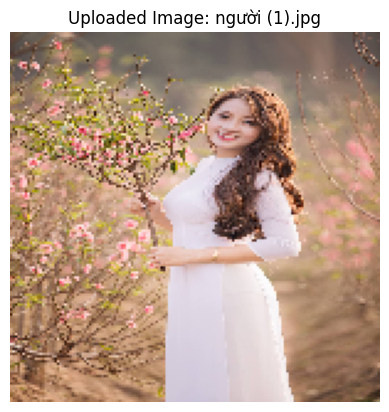

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Ảnh trên là con ngựa


In [106]:
uploaded = files.upload()

for fn in uploaded.keys():
  path ='./' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img) / 255.0

  # Hiển thị ảnh gốc
  plt.imshow(img)
  plt.title(f"Uploaded Image: {fn}")
  plt.axis('off')  # Tắt các trục
  plt.show()

  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images)

  if classes[0] > 0.5:
    print('Ảnh trên là con người')
  else:
    print('Ảnh trên là con ngựa')

In [110]:
model_save_path = 'horse-or-human/pretrain.keras'
model.save(model_save_path)